In [221]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randint

In [222]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [223]:
train_df

,x1,x2,target
0,0.525642,0.133813,1.0
1,1.009394,0.925323,1.0
2,0.776517,-0.252655,1.0
3,-0.245693,-0.872614,0.0
4,-1.540663,-0.048947,0.0
...,...,...,...
145,0.887016,-0.254848,1.0
146,-0.240418,-0.252660,0.0
147,-1.583462,-1.149453,0.0
148,-1.009593,0.135440,0.0


Text(0.5, 1.0, 'Train Data')

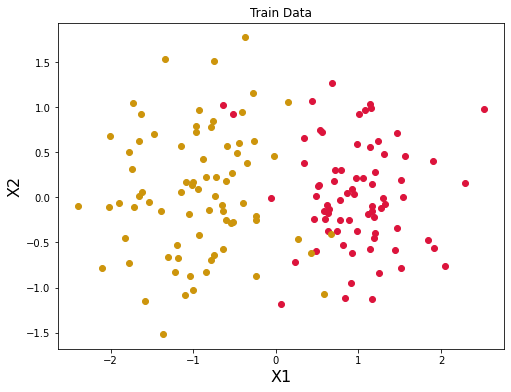

In [224]:
plt.figure(figsize=(8,6))
for i in range(len(train_df['x1'])):
    plt.plot(train_df['x1'][i],train_df['x2'][i], 'o', color =['#DC143C' if train_df['target'][i]==1 else '#CD950C'][0])
plt.xlabel("X1", size = 16)
plt.ylabel("X2", size = 16)
plt.title("Train Data")

# Perceptron based on Pocket Algorithm

In [225]:
for i in range(len(train_df['target'])):
    if train_df['target'][i] == 0:
        train_df.loc[i,'target'] = -1
train_df

,x1,x2,target
0,0.525642,0.133813,1.0
1,1.009394,0.925323,1.0
2,0.776517,-0.252655,1.0
3,-0.245693,-0.872614,-1.0
4,-1.540663,-0.048947,-1.0
...,...,...,...
145,0.887016,-0.254848,1.0
146,-0.240418,-0.252660,-1.0
147,-1.583462,-1.149453,-1.0
148,-1.009593,0.135440,-1.0


In [255]:
x_train = train_df[['x1','x2']]
y_train = train_df['target']

In [256]:
number_of_iteration = 1000
alpha = 0.1
weights = randint(-10, 10, 2)
best_weights = weights
iteration = 0
mis_classifications = 150

In [293]:
def perceptron_pocket(x_data, y_data , number_of_iteration, alpha):
    weights = randint(-10, 10, 2)
    bias = 0
    best_bias = bias
    best_weights = weights
    iteration = 0
    mis_classifications = len(y_data.to_numpy())
    best_mis_classifications = mis_classifications
    while (mis_classifications>0 and iteration < number_of_iteration):      
        mis_classifications = len(y_data.to_numpy())
        
        for x,y in zip(x_data.to_numpy(),y_data.to_numpy()):
            if y * np.sign(np.dot(x, weights) + bias) <= 0:
                weights = alpha * x * y
                bias += alpha * y
            else:
                mis_classifications -= 1
                
            if mis_classifications < best_mis_classifications:
                best_weights = weights.copy()
                best_bias = bias
                best_mis_classifications = mis_classifications 
                
        iteration +=1 
        weights = best_weights
        bias = best_bias
        
    return best_weights , best_bias
    

In [294]:
def test_accuracy(x_data, y_data , weights, bias):
        return round(sum(np.sign(np.dot(x_data.to_numpy(), weights) + bias)*y_data)*100/len(y_data.to_numpy()),2)

In [295]:
b_weights , b_bias = perceptron_pocket(x_train, y_train, 1000 , 0.01)

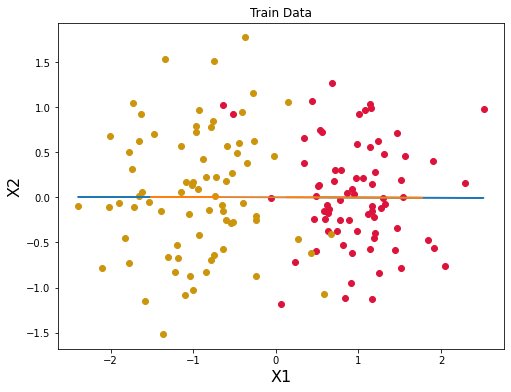

In [298]:
test_accuracy(x_train, y_train , b_weights, b_bias)

88.0